<a href="https://colab.research.google.com/github/aaron-v19/practice/blob/main/Neural_Network_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification

## 1. Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000

# Create Circles
X,y=make_circles(n_samples,
                 noise =0.03,
                 random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [5]:
 import pandas as pd
 circles=pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})

In [6]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


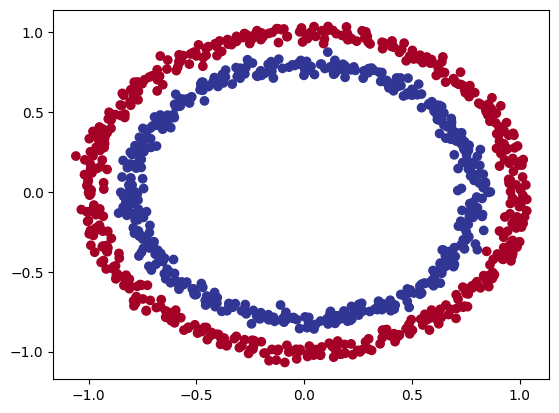

In [7]:
# Visualize, Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

1.1  Check imput and output shape

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
#view the first sample of featirea and labels
X_sample=X[0]
y_sample=y[0]

print(f" Value of X_sample: {X_sample} and Value of y_sample: {y_sample}")
print(f" Shapes of one sample of X:{X_sample.shape}  and Shapes of one sample of y:{y_sample.shape} ")

 Value of X_sample: [0.75424625 0.23148074] and Value of y_sample: 1
 Shapes of one sample of X:(2,)  and Shapes of one sample of y:() 


In [11]:
import torch
torch.__version__

'2.3.1+cu121'

In [12]:
type(X),type(y), X.dtype,y.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [13]:
# turn data into tensor
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X),X.dtype

(torch.Tensor, torch.float32)

In [15]:
#Split Data into trainig and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42,
                                               shuffle=False)

In [16]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

# 2. Building a Model

Let's build a model to classify the red and blue dots

To do so
1. Setup device agnostic code
2. Construct a model
3. Define a loss function and optimizer
4. Create a training loop

In [17]:
# Import Pytorch and nn
import torch
from torch import nn

In [18]:
# Setup device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

 Now we've setup device agnostic code let's create a model that:

 1. Subclassses `nn.Module`
 2. Cereate 2 `nn.Linear()` layers
 3. Define a `forward()` method
 4. Instantiate an instance of our model and send it to target device

In [19]:
from sklearn import datasets
# 1. Consttruct a model that sublclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.layers to handle the shape of our data
    self.layer_1=nn.Linear(in_features=2,
                           out_features=5)
    self.layer_2=nn.Linear(in_features=5,
                           out_features=1)
    self.two_linear_layers=nn.Sequential(
        nn.Linear(in_features=2,
                  out_features=5),
        nn.Linear(in_features=5,
                  out_features=1)
    )
  def forward(self,x):
    return self.layer_2(self.layer_1(x))  #x-> layer_1-> layer_2-> output


In [20]:
model_0=CircleModelV0().to(device)
model_0,device

(CircleModelV0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
   (two_linear_layers): Sequential(
     (0): Linear(in_features=2, out_features=5, bias=True)
     (1): Linear(in_features=5, out_features=1, bias=True)
   )
 ),
 'cpu')

In [21]:
next(model_0.parameters()).device

device(type='cpu')

In [22]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5309,  0.2806],
                      [-0.0462, -0.5371],
                      [ 0.1428,  0.4061],
                      [ 0.5642,  0.1945],
                      [ 0.3005, -0.5844]])),
             ('layer_1.bias',
              tensor([-0.0257,  0.0923,  0.2030, -0.2314, -0.5038])),
             ('layer_2.weight',
              tensor([[ 0.3208,  0.1606, -0.2922,  0.0590,  0.0760]])),
             ('layer_2.bias', tensor([0.0626])),
             ('two_linear_layers.0.weight',
              tensor([[-0.6213,  0.0292],
                      [-0.4077,  0.0880],
                      [-0.3849,  0.1001],
                      [-0.5946, -0.1186],
                      [-0.3577, -0.0407]])),
             ('two_linear_layers.0.bias',
              tensor([ 0.7000,  0.6536,  0.6455, -0.2224,  0.1399])),
             ('two_linear_layers.1.weight',
              tensor([[-0.1197, -0.0034, -0.3628,  0.0155,  0.3659]])),
             ('tw

In [23]:
# make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f" lenght and shape untrained \n {len(untrained_preds),untrained_preds.shape}")

print(f" lenght and shape test \n {len(X_test),X_test.shape}")

print(f" First 10 predictions: \n {untrained_preds[:10]} "   )
print(f" First 10 labels: \n {y_test[:10]} "   )

 lenght and shape untrained 
 (200, torch.Size([200, 1]))
 lenght and shape test 
 (200, torch.Size([200, 2]))
 First 10 predictions: 
 tensor([[-0.0072],
        [ 0.1265],
        [-0.0691],
        [-0.0940],
        [-0.0796],
        [-0.2343],
        [-0.2318],
        [-0.2526],
        [ 0.0654],
        [ 0.0515]]) 
 First 10 labels: 
 tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 0.]) 


# 2.1 Setup Loss function and optimizer

which loss function is appropriate for our problem

Again .... This is problem specific

For regression MSE  or MAE

For Classification you might want binary cross entropy or categorical cross entropy

Most common used optimizers are SGD and adam , though pytorch provides more

For loss fn we are using `torch.nn.BCEWithLogitsLoss()`

In [24]:
loss_fn=nn.BCEWithLogitsLoss()   #sigmoid activation function built in
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [25]:
# Calculate Accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

#3. Train the model

1. Forward Pass
2. Calculate Loss
3. Optimizer Zero grad
4. Loss Backward
5. Optimizer Step

### 3.1 Going from raw logits-> prediction probabilities-> prediction labels

Our model output are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function

Then we can convert our model's prediction  probabilities into prediction labels

In [26]:
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0072],
        [ 0.1265],
        [-0.0691],
        [-0.0940],
        [-0.0796]])

In [27]:
y_test[:5]

tensor([1., 1., 1., 1., 0.])

In [28]:
# use sigmoid activation functions to our model logits to turn them into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4982],
        [0.5316],
        [0.4827],
        [0.4765],
        [0.4801]])

For our prediction probabilities , we need to perform range style rounding on them

* `y_pred_probs`>-0.5 , `y=1` (class 1)
* `y_pred_probs`<-0.5 , `y=0` (class 0)

In [29]:
#Find the predicted labels
y_preds=torch.round(y_pred_probs)

#in full (logits->pred probs -> pred labels)
y_preds_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print (torch.eq(y_preds.squeeze(),y_preds_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 1., 0., 0., 0.])

In [33]:
y_test[:5],y_preds[:5]

(tensor([1., 1., 1., 1., 0.]),
 tensor([[0.],
         [0.],
         [0.],
         [1.],
         [0.]], device='cuda:0'))

### 3.2 Training and test loop


In [80]:
epochs =1000
torch.manual_seed(42)

X_train,X_test=X_train.to(device),X_test.to(device)
y_train,y_test=y_train.to(device),y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  #1. Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2. Calculate loss
  loss=loss_fn(y_logits,
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer
  optimizer.zero_grad()

  #4. loss backwards back propogation
  loss.backward()

  #5. Optimizer step( gradient descent)
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #calculate loss test loss/acc
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

    #print progress
    if epoch%50==49:
      print(f"Epoch :{epoch+1} | Loss: {loss:.5f} | Acc: {acc:.2f}%, Test Loss:{test_loss:.5f}, Test Acc:{test_acc:.2f}%")


Epoch :50 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :100 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :150 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :200 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :250 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :300 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :350 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :400 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :450 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :500 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :550 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :600 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :650 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%


##4. Make predictions and evaluate the model

From metrics it looks like our model isn't learning anything

So inspect it

To do so we are importing plot_decicion_boundary

In [30]:
import requests
from pathlib import Path

#Download helper functions from Learn pytorch

if Path("helper_functions.py").is_file():
  print("helper_function.py is already exist")
else:
  print("Download helper_function.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary,plot_predictions

Download helper_function.py


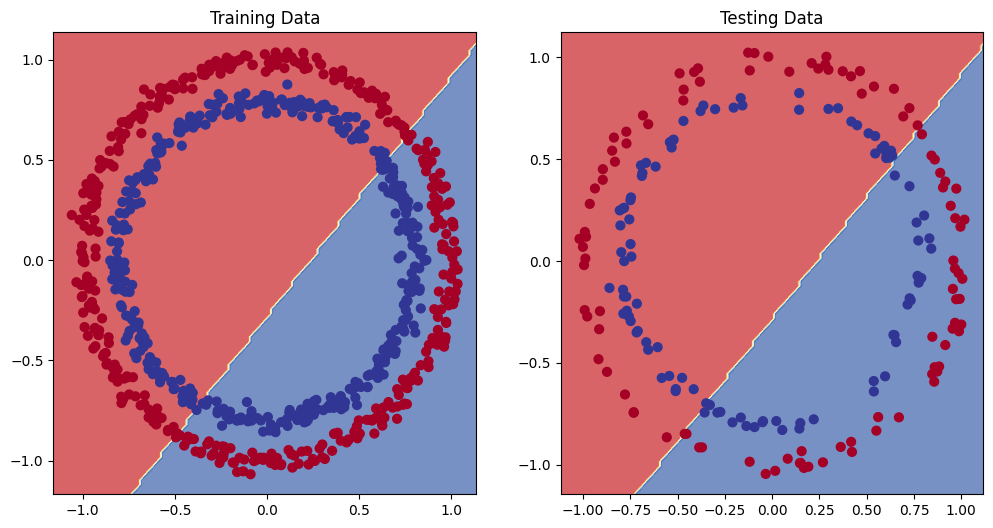

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_0,X_test,y_test)

#5. Improving a model
* Add more layers-give the model more chances to learn apout patterns
* Add more hidden units
* fit for longer
* Change activation function
* Changing learning rate
* Change loss function
* Change optimizer

These are all froma model's perspective because they deal directly with the moel rather than the data

And because these options are alll values we can change , The are called **hyperparameters**

In [32]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    #z=self.layer_1(x)
    #z=self.layer_2(z)
    #z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))  # this way of writing leverages speed ups where possible behind the scene

model_1=CircleModelV1().to(device)

model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.1339, -0.0325],
                      [ 0.4598, -0.6856],
                      [-0.3929,  0.2698],
                      [-0.4715,  0.3014],
                      [ 0.4368,  0.4693],
                      [-0.6403, -0.2726],
                      [ 0.1873, -0.5972],
                      [ 0.6543,  0.0901],
                      [-0.1169, -0.5120],
                      [-0.4188,  0.4381]])),
             ('layer_1.bias',
              tensor([ 0.0377,  0.0778, -0.1491, -0.6911, -0.3450, -0.1839,  0.0559, -0.5530,
                       0.6124, -0.2199])),
             ('layer_2.weight',
              tensor([[ 0.2899,  0.0869,  0.1375,  0.1305, -0.1548, -0.0783,  0.0517, -0.2619,
                       -0.2607,  0.2743],
                      [ 0.3079, -0.1834, -0.0828,  0.0291,  0.2914,  0.1134,  0.2797,  0.1357,
                       -0.0079,  0.2935],
                      [-0.1607, -0.2388,  0.1757, -0.3020, -0.2324, -0.1

In [34]:
#Create a loss fn
loss_fn=nn.BCEWithLogitsLoss()   #sigmoid activation function built in

#create an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)


In [35]:
torch.manual_seed(42)

torch.cuda.manual_seed(42)

epochs=1000

X_train,X_test=X_train.to(device),X_test.to(device)
y_train,y_test=y_train.to(device),y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward Pass
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2. loss function
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer Zero Grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer Step
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #2. Calculate loss
    test_loss=loss_fn(test_logits,
                      y_test)

    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)
  if epoch%100==99:
      print(f"Epoch :{epoch+1} | Loss: {loss:.5f} | Acc: {acc:.2f}%, Test Loss:{test_loss:.5f}, Test Acc:{test_acc:.2f}%")

Epoch :100 | Loss: 0.69262 | Acc: 51.12%, Test Loss:0.69792, Test Acc:44.50%
Epoch :200 | Loss: 0.69249 | Acc: 52.38%, Test Loss:0.69875, Test Acc:41.00%
Epoch :300 | Loss: 0.69247 | Acc: 52.50%, Test Loss:0.69915, Test Acc:41.00%
Epoch :400 | Loss: 0.69247 | Acc: 52.75%, Test Loss:0.69931, Test Acc:41.00%
Epoch :500 | Loss: 0.69247 | Acc: 52.62%, Test Loss:0.69938, Test Acc:41.00%
Epoch :600 | Loss: 0.69247 | Acc: 52.62%, Test Loss:0.69940, Test Acc:41.00%
Epoch :700 | Loss: 0.69247 | Acc: 52.62%, Test Loss:0.69941, Test Acc:41.00%
Epoch :800 | Loss: 0.69247 | Acc: 52.62%, Test Loss:0.69942, Test Acc:41.00%
Epoch :900 | Loss: 0.69247 | Acc: 52.62%, Test Loss:0.69942, Test Acc:41.00%
Epoch :1000 | Loss: 0.69247 | Acc: 52.62%, Test Loss:0.69942, Test Acc:41.00%


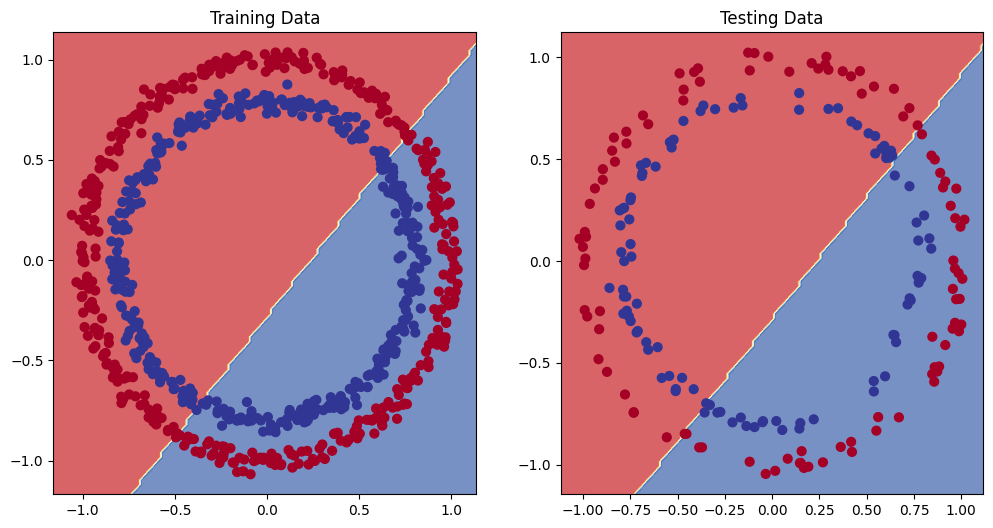

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_0,X_test,y_test)

In [40]:
# create *known* parameters
weight=0.7
bias=0.3

#create
start =0
end=1
step=0.01
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias

X_regression[:10],y_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [41]:
#Create train test split

train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]

#Check the length of each
len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

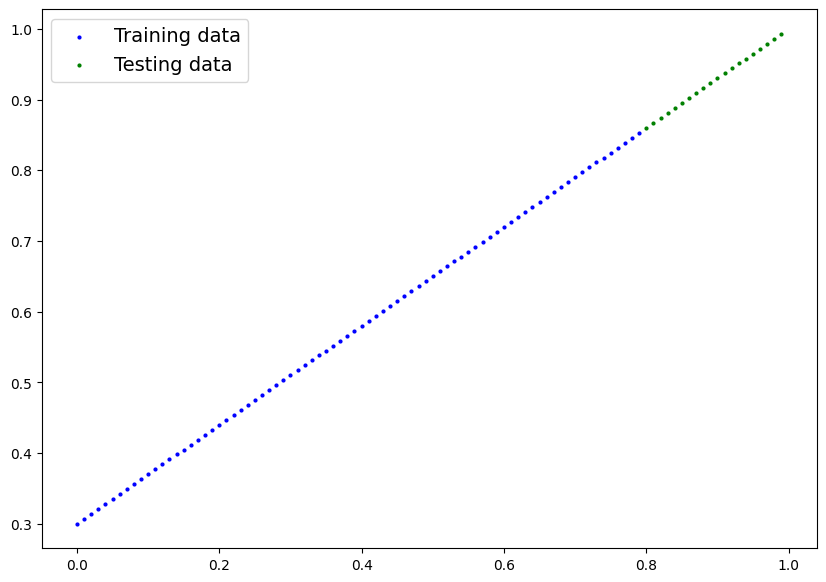

In [43]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)

In [75]:
### 5.2 Adjust model_1 to fit Straight line

model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)


model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [76]:
# Loss and optimizer

loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01)

In [77]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train_regression,X_test_regression=X_train_regression.to(device),X_test_regression.to(device)
y_train_regression,y_test_regression=y_train_regression.to(device),y_test_regression.to(device)

#training

for epoch in range(epochs):
  model_2.train()

  y_pred=model_2(X_train_regression)
  loss=loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)

  if epoch%100==0:
    print(f"Epoch :{epoch} | Loss: {loss:.5f} | Test Loss:{test_loss:.5f}")

Epoch :1 | Loss: 0.75986 | Test Loss:0.91103
Epoch :101 | Loss: 0.02858 | Test Loss:0.00081
Epoch :201 | Loss: 0.02533 | Test Loss:0.00209
Epoch :301 | Loss: 0.02137 | Test Loss:0.00305
Epoch :401 | Loss: 0.01964 | Test Loss:0.00341
Epoch :501 | Loss: 0.01940 | Test Loss:0.00387
Epoch :601 | Loss: 0.01903 | Test Loss:0.00379
Epoch :701 | Loss: 0.01878 | Test Loss:0.00381
Epoch :801 | Loss: 0.01840 | Test Loss:0.00329
Epoch :901 | Loss: 0.01798 | Test Loss:0.00360


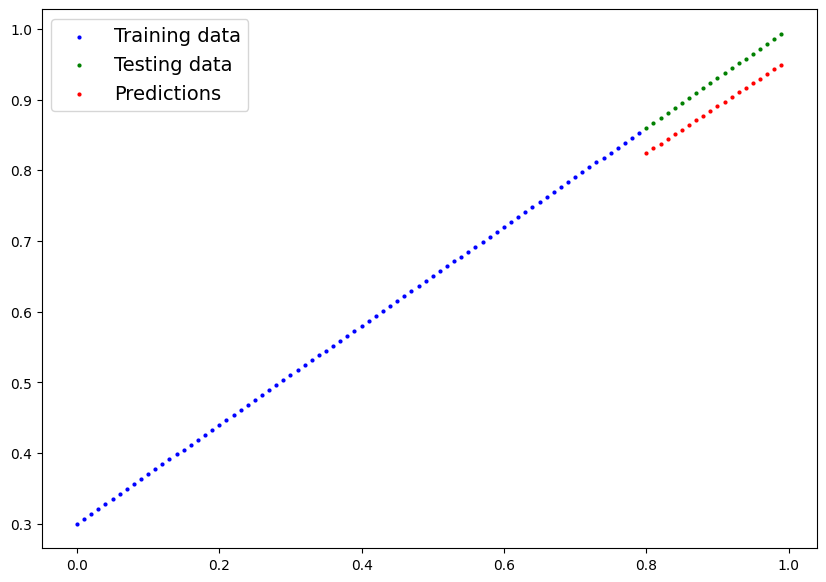

In [78]:
# turn on evaluation mode
model_2.eval()

#make predictions
with torch.inference_mode():
  y_preds=model_2(X_test_regression)

#plot predictions
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

# 6. Missing Piece : non-Linearity



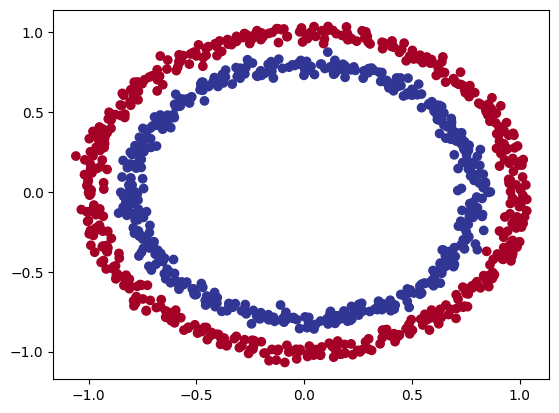

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X_circles,y_circles=make_circles(n_samples=n_samples,
                                 noise=0.03,
                                 random_state=42)

plt.scatter(X_circles[:,0],X_circles[:,1],c=y_circles,cmap=plt.cm.RdYlBu)

In [99]:
#convert Data to tensors
import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X_circles).type(torch.float)
y=torch.from_numpy(y_circles).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# Building a model with non linearity

In [126]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [127]:
#Create a loss fn
loss_fn=nn.BCEWithLogitsLoss()   #sigmoid activation function built in

#create an optimizer
optimizer=torch.optim.SGD(params=model_3.parameters(),
                          lr=0.1)


In [133]:
torch.manual_seed(42)

torch.cuda.manual_seed(42)

epochs=1000

X_train,X_test=X_train.to(device),X_test.to(device)
y_train,y_test=y_train.to(device),y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  #1. Forward Pass
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2. loss function
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer Zero Grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer Step
  optimizer.step()

  #Testing
  model_3.eval()
  with torch.inference_mode():
    #1. Forward pass
    #test_logits=model_3(X_test).squeeze()
    #test_pred=torch.round(torch.sigmoid(test_logits))
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate loss
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)



  if epoch%100==0:
      print(f"Epoch :{epoch+1} | Loss: {loss:.5f} | Acc: {acc:.2f}%, Test Loss:{test_loss:.5f}, Test Acc:{test_acc:.2f}%")

Epoch :1 | Loss: 0.56818 | Acc: 87.75%, Test Loss:0.57378, Test Acc:86.50%
Epoch :101 | Loss: 0.48153 | Acc: 93.50%, Test Loss:0.49935, Test Acc:90.50%
Epoch :201 | Loss: 0.37056 | Acc: 97.75%, Test Loss:0.40595, Test Acc:92.00%
Epoch :301 | Loss: 0.25458 | Acc: 99.00%, Test Loss:0.30333, Test Acc:96.50%
Epoch :401 | Loss: 0.17180 | Acc: 99.50%, Test Loss:0.22108, Test Acc:97.50%
Epoch :501 | Loss: 0.12188 | Acc: 99.62%, Test Loss:0.16512, Test Acc:99.00%
Epoch :601 | Loss: 0.09123 | Acc: 99.88%, Test Loss:0.12741, Test Acc:99.50%
Epoch :701 | Loss: 0.07100 | Acc: 99.88%, Test Loss:0.10319, Test Acc:99.50%
Epoch :801 | Loss: 0.05773 | Acc: 99.88%, Test Loss:0.08672, Test Acc:99.50%
Epoch :901 | Loss: 0.04853 | Acc: 99.88%, Test Loss:0.07474, Test Acc:99.50%


### 6.4 Evaluating code written with non_linear data  

In [132]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test).squeeze()))
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

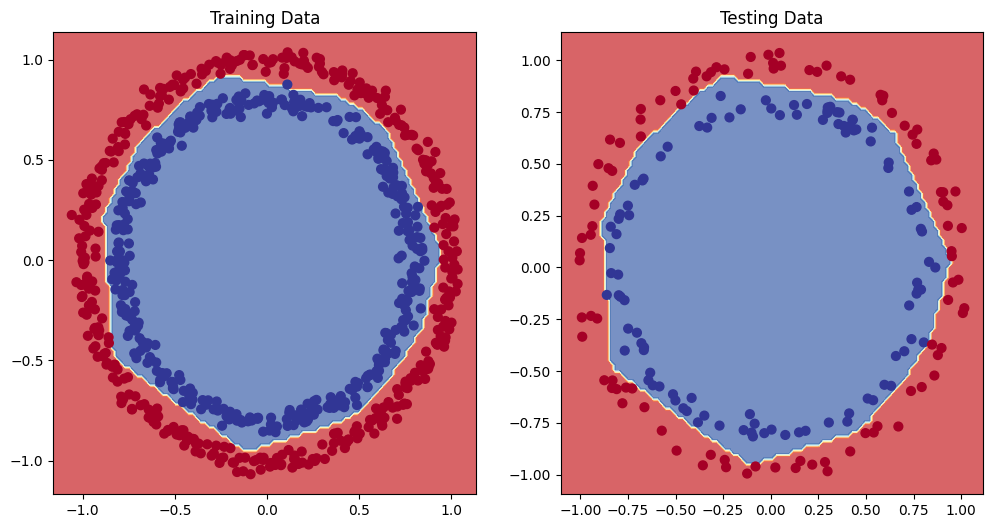

In [134]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_3,X_test,y_test)

## 7. Replicating non-linear activation function

In [135]:
#Create a tensor

A=torch.arange(-10,10,1,dtype=torch.float32)
A,A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

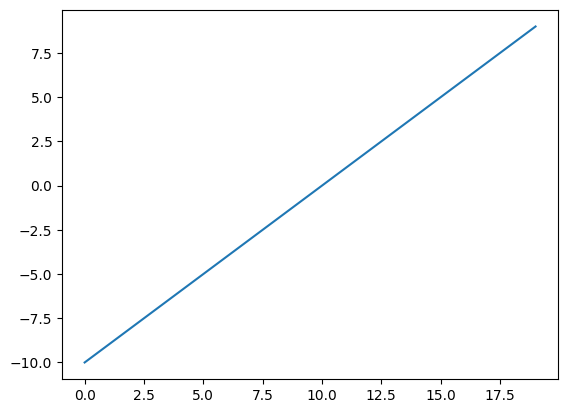

In [136]:
plt.plot(A)

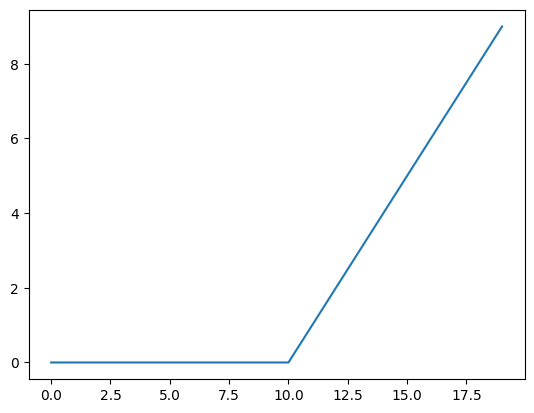

In [137]:
plt.plot(torch.relu(A))

In [138]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

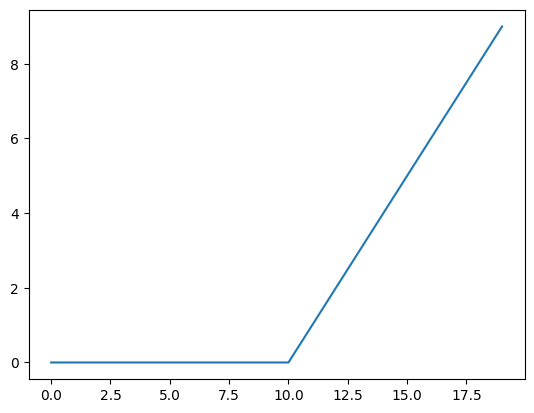

In [144]:
plt.plot(relu(A))
A

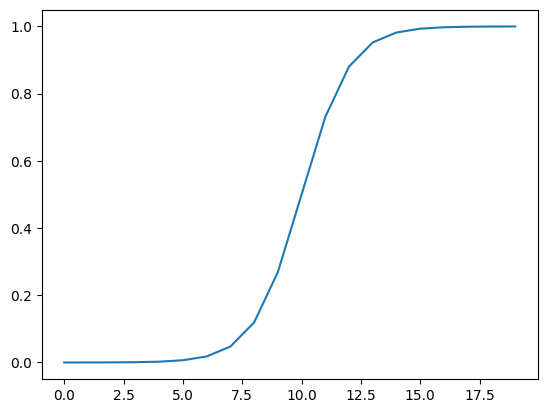

In [146]:
plt.plot(torch.sigmoid(A))

In [141]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

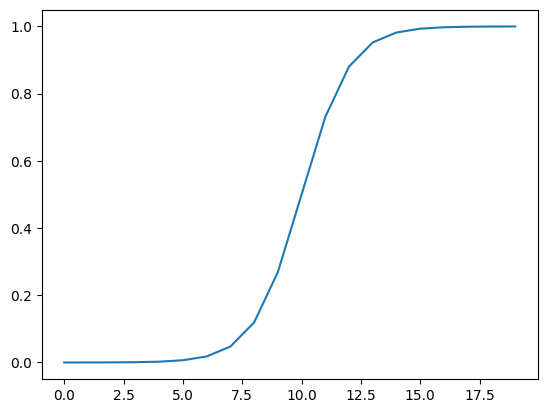

In [142]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi class classifiction


### 8.1Creating Toy multi class dataset

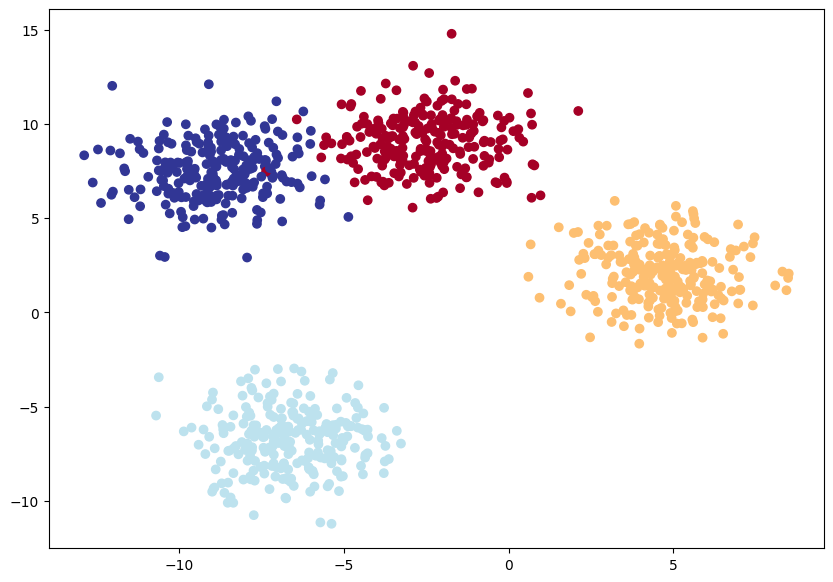

In [149]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set hyperparameters for data creation
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

#1. Create multi class data
X_blob,y_blob=make_blobs(n_samples=1000,
                        n_features=NUM_FEATURES,
                        centers=NUM_CLASSES,
                        cluster_std=1.5,
                        random_state=RANDOM_SEED)

#2. Turn dta into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.float)

#3 Split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X_blob,
                                                 y_blob,
                                                 test_size=0.2,
                                                 random_state=RANDOM_SEED)

#4. Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

### 8.2 Building a multiclass classification model in pytorch

In [150]:
#create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [153]:
#Build multi class classification model

class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [156]:
X_train.shape,y_blob[:5]

(torch.Size([800, 2]), tensor([3., 2., 2., 1., 1.]))

In [157]:
torch.unique(y_train)

tensor([0., 1., 2., 3.])

###8.3 Create loss function and optimizer

In [158]:
##loss function
loss_fn=nn.CrossEntropyLoss()

#Optimizer
optimizer=torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1)

In [161]:
model_4(X_test[:5].to(device))

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], grad_fn=<AddmmBackward0>)

### 8.4 Getting prediction probabilities fro a multiclass Pytorch model..

In order to evaluate and train and test our model, we need to convert our outputs

logit-> pred probs->pred labels

In [174]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [172]:
y_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [175]:
# Convert our logit output to prediction probabilitiies
y_pred_probs=torch.softmax(y_logits,dim=1)
print (y_logits[:5])
print (y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])
